# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Сборочные производства', 'Торговля', 'Нефтегазовая промышленность', 'Государственная служба', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Транспорт', 'Информационные услуги', 'Туризм', 'Логистика', 'Образование', 'Недвижимость', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'Энергетика', 'Здравоохранение', 'Информационные технологии', 'Строительство', 'Металлургия/Промышленность/Машиностроение', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Другие сферы', 'Страхование', 'Наука'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

ПО df.info() пропуски есть

<b>Категориальные признаки:</b>
- GEN_INDUSTRY                  27420 non-null object
- GEN_TITLE                     27420 non-null object
- ORG_TP_STATE                  27420 non-null object
- ORG_TP_FCAPITAL               27425 non-null object
- JOB_DIR                       27420 non-null object
- TP_PROVINCE                   29543 non-null object

<b>Числовые:</b>
- WORK_TIME                     27416 non-null float64
- PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

In [16]:
len(df[ 
    (df['GEN_INDUSTRY'].isnull() == True) &  (df['GEN_TITLE'].isnull() == True) & (df['ORG_TP_STATE'].isnull() == True) &
    (df['ORG_TP_FCAPITAL'].isnull() == True) & (df['JOB_DIR'].isnull() == True) 
])

2707

Большинство строк с пропусками у одних значений. Проще удалить т.к. это около 10% данных.

In [17]:
len(
    df[df['TP_PROVINCE'] != df['POSTAL_ADDRESS_PROVINCE']]
) / len(
    df[df['TP_PROVINCE'] == df['POSTAL_ADDRESS_PROVINCE']]
)

0.0972616706722016

Пропуски в TP_PROVINCE можно заполнить данными из POSTAL_ADDRESS_PROVINCE т.к. они на 90% совпадают

Для числовых признаков можно взять медианы значений из этих столбцов.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Часть данных можно удалить (AGREEMENT_RK)

К остальным применить one-hot кодирование

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #  1) удаляем идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis = 1, inplace = True)
    
    #  2) Избавляемся от проблем с . и ,
    for column in {'PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'}:
        df_output[column] = df_output[column].map(lambda x: x.replace(',', '.')).astype('float')
        
    #  3) корректируем датафрейм для устранения пропусков
    
    # 3.1) удаляем строки в которых нет данных
    for column in {'GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR'}:
        df_output = df_output[~df[column].isnull()]
        
    # 3.2) TP_PROVINCE
    df_output['TP_PROVINCE'][df_output['TP_PROVINCE'].isnull()] = df_output['POSTAL_ADDRESS_PROVINCE']
    
    # 3.3) REGION_NM - одно значение во всем датафрейме. не несёт полезной информации в данном случае
    #df_output['REGION_NM'][df_output['REGION_NM'].isnull()] = 'ЗАПАДНО-СИБИРСКИЙ'
    df_output.drop('REGION_NM', axis = 1, inplace = True)
    
    # 3.4) PREVIOUS_CARD_NUM_UTILIZED    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    # 3.5) WORK_TIME - заполняем пропуски медианой. 
    med = df_output['WORK_TIME'].median()
    df_output['WORK_TIME'].fillna(med, inplace = True)
    
    # 4) Кодируем категориальные признаки
    object_columns = ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'FAMILY_INCOME',
                      'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE',
                      'JOB_DIR', 'ORG_TP_FCAPITAL']
    
    df_output = pd.get_dummies(df_output, columns=object_columns)

    
    
    return df_output

In [19]:
df_preproc = df.pipe(preproc_data)

In [20]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [21]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 0 to 14909
Columns: 436 entries, TARGET to ORG_TP_FCAPITAL_С участием
dtypes: float64(7), int64(31), uint8(398)
memory usage: 9.2 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [22]:
X_train, y_train = df_train_preproc.iloc[:,1:], df_train_preproc.iloc[:,0]
X_test, y_test = df_test_preproc.iloc[:,1:],   df_test_preproc.iloc[:,0]

In [23]:
# from sklearn.cross_validation import train_test_split
# # test_size=0.3, random_state=42

# X_train, X_test, y_train, y_test = train_test_split()


#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# 1) LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
predict_1 = model_1.predict(X_test)
predict_proba_1 = model_1.predict_proba(X_test)

In [26]:
# 2) DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predict_2 = model_2.predict(X_test)
predict_proba_2 = model_2.predict_proba(X_test)

In [27]:
# 3) RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
predict_3 = model_3.predict(X_test)
predict_proba_3 = model_3.predict_proba(X_test)

In [28]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

precision_score(y_test, predict_1)

## Your Code Here

0.0

In [29]:
print('1) LogisticRegression:')

accuracy_1 = accuracy_score(y_test, predict_1)
precision_1 = precision_score(y_test, predict_1)
recall_1 = recall_score(y_test, predict_1)

print ('Accuracy:{:.3}, Precision:{:.3}, Recall:{:.3}'.format(accuracy_1, precision_1, recall_1))

#print(classification_report(y_test,predict_1))

1) LogisticRegression:
Accuracy:0.873, Precision:0.0, Recall:0.0


In [30]:
print('2) DecisionTreeClassifier:')

accuracy_2 = accuracy_score(y_test, predict_2)
precision_2 = precision_score(y_test, predict_2)
recall_2 = recall_score(y_test, predict_2)

print ('Accuracy:{:.3}, Precision:{:.3}, Recall:{:.3}'.format(accuracy_2, precision_2, recall_2))

#print(classification_report(y_test,predict_2))

2) DecisionTreeClassifier:
Accuracy:0.79, Precision:0.179, Recall:0.182


In [31]:
print('3) RandomForestClassifier:')

accuracy_3 = accuracy_score(y_test, predict_3)
precision_3 = precision_score(y_test, predict_3)
recall_3 = recall_score(y_test, predict_3)

print ('Accuracy:{:.3}, Precision:{:.3}, Recall:{:.3}'.format(accuracy_3, precision_3, recall_3))

#print(classification_report(y_test,predict_3))

3) RandomForestClassifier:
Accuracy:0.872, Precision:0.237, Recall:0.00524


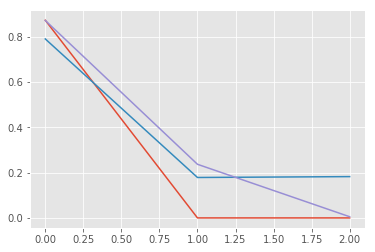

In [32]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

plt.plot([[accuracy_1,accuracy_2,accuracy_3], [precision_1, precision_2, precision_3], [recall_1, recall_2, recall_3]])

In [33]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, predict_proba_1[:,1])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, predict_proba_2[:,1])
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, predict_proba_3[:,1])

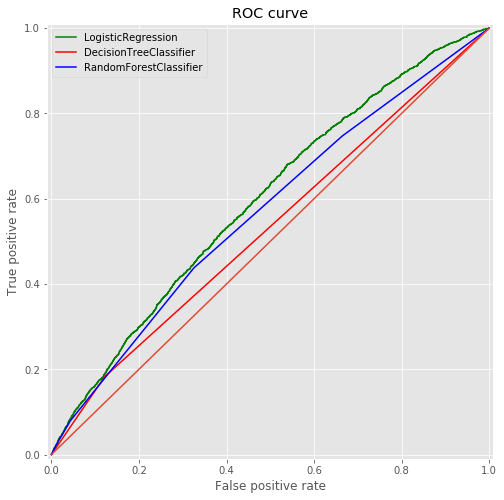

In [34]:
# строим roc-auc кривую
plt.figure(figsize=(8,8))
plt.plot(fpr_1,tpr_1,'g', label='LogisticRegression')
plt.plot(fpr_2,tpr_2,'r', label='DecisionTreeClassifier')
plt.plot(fpr_3,tpr_3,'b', label='RandomForestClassifier')
plt.plot([0,1],[0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [35]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

# Объеденяем тест и трейн
df_full = df_train_preproc.append(df_test_preproc).reset_index(drop=True)
X_full, y_full = df_full.iloc[:,1:], df_full.iloc[:,0]

C:\python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# LogisticRegression
model_l = LogisticRegression()
roc_auc_l = cross_val_score(
                            model_l,
                            X_full,
                            y_full,
                            scoring='roc_auc',
                            cv=10
                            )

In [37]:
print(roc_auc_l)
print('\nLogisticRegression mean roc auc=', roc_auc_l.mean())

[0.61566842 0.61751121 0.59573743 0.61506256 0.58460327 0.57713849
 0.60160339 0.57933987 0.61766929 0.64069155]

LogisticRegression mean roc auc= 0.6045025474654718


In [38]:
# DecisionTreeClassifier
model_d = DecisionTreeClassifier()
roc_auc_d = cross_val_score(
                            model_d,
                            X_full,
                            y_full,
                            scoring='roc_auc',
                            cv=10
                            )

In [39]:
print(roc_auc_d)
print('\nDecisionTreeClassifier mean roc auc=', roc_auc_d.mean())

[0.5256887  0.52310734 0.54896941 0.54115173 0.51971524 0.53003198
 0.51566416 0.51140423 0.5205834  0.5191828 ]

DecisionTreeClassifier mean roc auc= 0.5255498973273959


In [40]:
# RandomForestClassifier
model_r = RandomForestClassifier()
roc_auc_r = cross_val_score(
                            model_r,
                            X_full,
                            y_full,
                            scoring='roc_auc',
                            cv=10
                            )

In [41]:
print(roc_auc_d)
print('\nRandomForestClassifier mean roc auc=', roc_auc_r.mean())

[0.5256887  0.52310734 0.54896941 0.54115173 0.51971524 0.53003198
 0.51566416 0.51140423 0.5205834  0.5191828 ]

RandomForestClassifier mean roc auc= 0.5837008014039953


In [42]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# по данным кросс валидации лучшее значение показала логистическая регрессия 

predict = model_1.predict_proba(X_test)
## Your Code Here

In [43]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
roc_auc_score (y_test, predict[:,1]) # чуть лучше чем "монетка" :D

0.5955288451701348

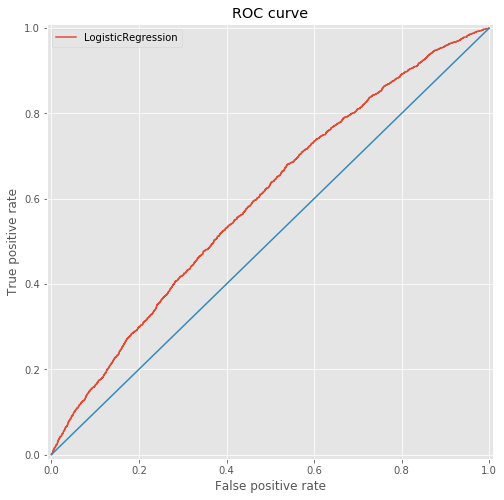

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])

# строим roc-auc кривую
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr, label='LogisticRegression')
plt.plot([0,1],[0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [45]:
### И далее ;)